# Customer Insights for Retail Sales Optimization

## Business Problem:
### To improve sales and customer engagement, retailers seek insights into general purchasing behaviors, demographic spending patterns, and high-demand product categories across various customer segments. By analyzing factors like age, gender, marital status, and purchase amounts, retailers can identify customer segments that contribute most significantly to revenue and optimize inventory and marketing strategies accordingly. This analysis will help in understanding the impact of demographic factors on purchasing behavior, allowing retailers to enhance their product offerings, tailor promotions, and make data-driven decisions to boost overall sales.

## Assumptions:
### 1. Customer purchasing patterns are consistent over the analysis period.
### 2. Pricing, promotions, and product availability significantly influence customer purchase behavior.
### 3. Seasonal events and holidays impact sales volume and product demand.
### 4. The dataset contains sufficient demographic information to analyze customer segmentation.
### 5. Product categories remain stable, with no major shifts in inventory or product types.

## Research Question:
### 1. Which factors (e.g., age, gender, region) most influence customer purchasing behavior?
### 2. How do seasonal changes and promotional events affect overall sales and specific product categories?
### 3. What customer segments exhibit the highest repeat purchase rates, and how can these be leveraged for targeted marketing?

## Hypothesis:
### 1. Higher discounts lead to an increase in overall sales volume.
### 2. Loyalty program members have a higher average purchase value than non-members.
### 3. Older customers (above 50) spend less frequently than younger customers.

## Importing Libraries

In [2]:
import numpy as np                        # to perform numerical operations 
import pandas as pd                       # for the dataframe/datasets
import matplotlib.pyplot as plt           # for data visualization
import seaborn as sns                     # for data visualization
import warnings as wn                     # to ignore the warnings
wn.filterwarnings("ignore")

## Loading the Dataset

In [3]:
df = pd.read_csv("D:\Excel Syllabus\Customer Insights for Retail Sales Optimization.csv",encoding="unicode_escape")
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


## Exploratory Data Analysis and Data Cleaning

In [27]:
df.shape

(11251, 15)

In [28]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Shaadi            11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [30]:
# drop unrelated/blank columns
df.drop(["Status","unnamed1"],axis=1,inplace=True)

In [31]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [32]:
# check for null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Shaadi               0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [33]:
# drop null values
df.dropna(inplace=True)

In [34]:
df.shape

(11239, 13)

In [35]:
# change data type
df["Amount"] = df["Amount"].astype(int)

In [36]:
df["Amount"].dtypes

dtype('int32')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Shaadi            11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [40]:
# rename column name
df.rename(columns={"Shaadi":"Marital_Status"},inplace=True)

In [41]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [42]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [45]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [92]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

## Data Analysis and Visualization

### 1. Gender

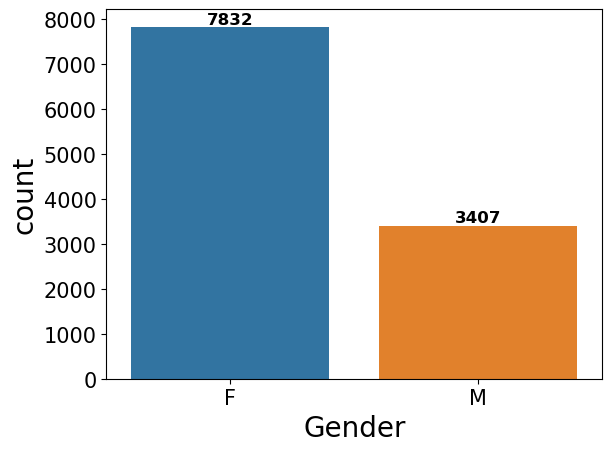

In [254]:
# plotting a bar chart for Gender and it's count

plt.xlabel("Gender",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax = sns.countplot(x = 'Gender',data = df)
for bars in ax.containers:                    # this for loop is used to display the data labels in the bar.
    ax.bar_label(bars,fontsize=12,weight="bold")

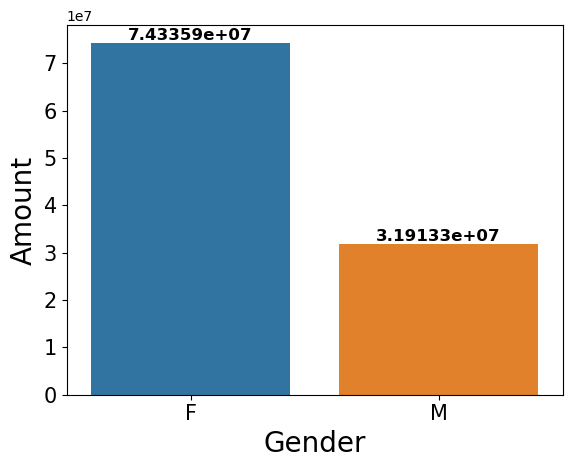

In [255]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values('Amount', ascending=False)
plt.xlabel("Gender",fontsize=20)
plt.ylabel("Amount",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
a = sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)
for bars in a.containers:
    a.bar_label(bars,fontsize=12,weight="bold")

### From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men.

### 2. Age

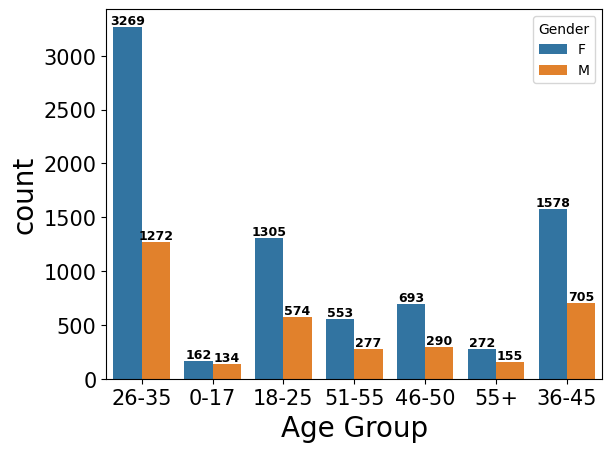

In [256]:
plt.xlabel("Age Group",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ct = sns.countplot(x="Age Group",data=df,hue="Gender")
for bars in ct.containers:
    ct.bar_label(bars,fontsize=9,weight="bold")

<Axes: xlabel='Age Group', ylabel='Amount'>

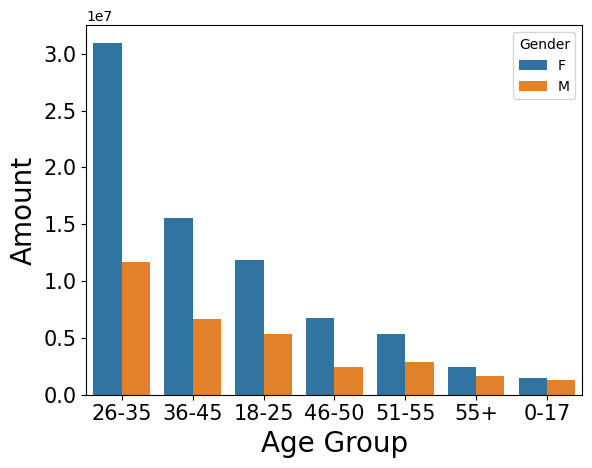

In [257]:
amt = df.groupby(["Age Group","Gender"],as_index=False)["Amount"].sum().sort_values("Amount",ascending=False)
plt.xlabel("Age Group",fontsize=20)
plt.ylabel("Amount",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
amg = sns.barplot(x="Age Group",y="Amount",data=amt,hue="Gender")
amg
#for bars in amg.containers:
#    amg.bar_label(bars,fontsize=12,weight="bold")

### From above graphs we can see that most of the buyers are of age group between 26-35 yrs female.

### 3. Marital Status

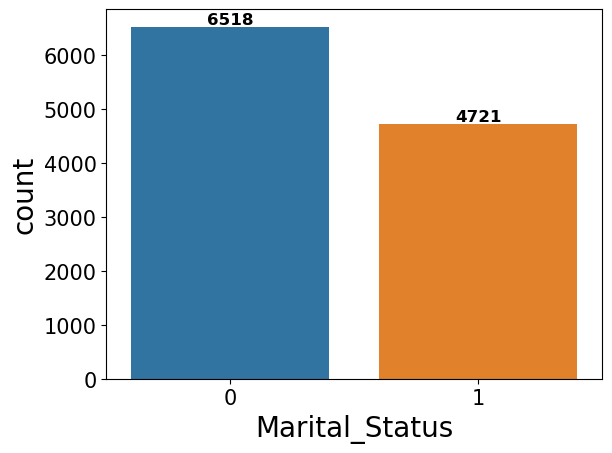

In [258]:
plt.xlabel("Marital_Status",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ct = sns.countplot(x="Marital_Status",data=df)
for dl in ct.containers:
    ct.bar_label(dl,fontsize=12,weight="bold")

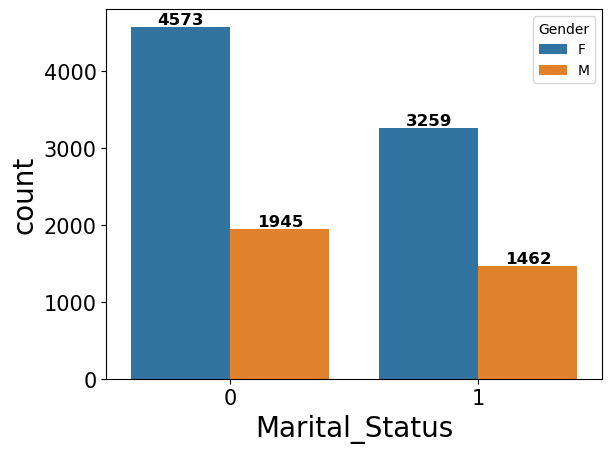

In [259]:
plt.xlabel("Marital_Status",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ct = sns.countplot(x="Marital_Status",data=df,hue="Gender")
for dl in ct.containers:
    ct.bar_label(dl,fontsize=12,weight="bold")

<Axes: xlabel='Marital_Status', ylabel='Amount'>

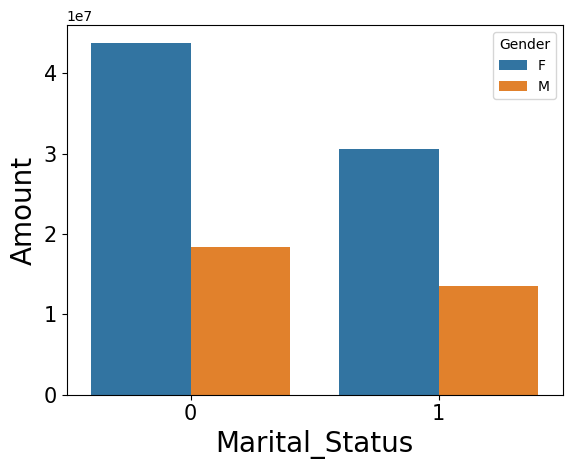

In [260]:
amt = df.groupby(["Marital_Status","Gender"],as_index=False)["Amount"].sum().sort_values("Amount",ascending=False)
plt.xlabel("Marital_Status",fontsize=20)
plt.ylabel("Amount",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ms = sns.barplot(x="Marital_Status",y="Amount",data=amt,hue="Gender")
ms

### From above graphs we can see that most of the buyers are married (women) and they have high purchasing power.

### 4. States

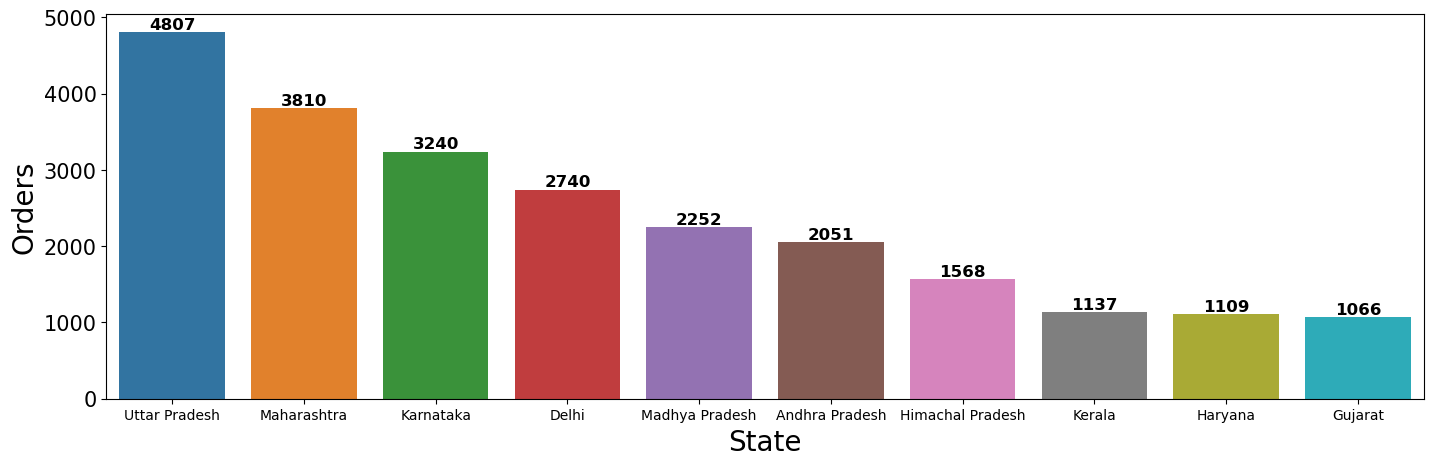

In [266]:
sort = df.groupby(["State"],as_index=False)["Orders"].sum().sort_values("Orders",ascending=False).head(10)
plt.figure(figsize=(17,5))
plt.xlabel("State",fontsize=20)
plt.ylabel("Orders",fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)
cty = sns.barplot(x="State",y="Orders",data=sort)
for dl in cty.containers:
    cty.bar_label(dl,fontsize=12,weight="bold")

In [156]:
am = df.groupby(["State"],as_index=False)["Amount"].sum().sort_values("Amount",ascending=False)
am

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


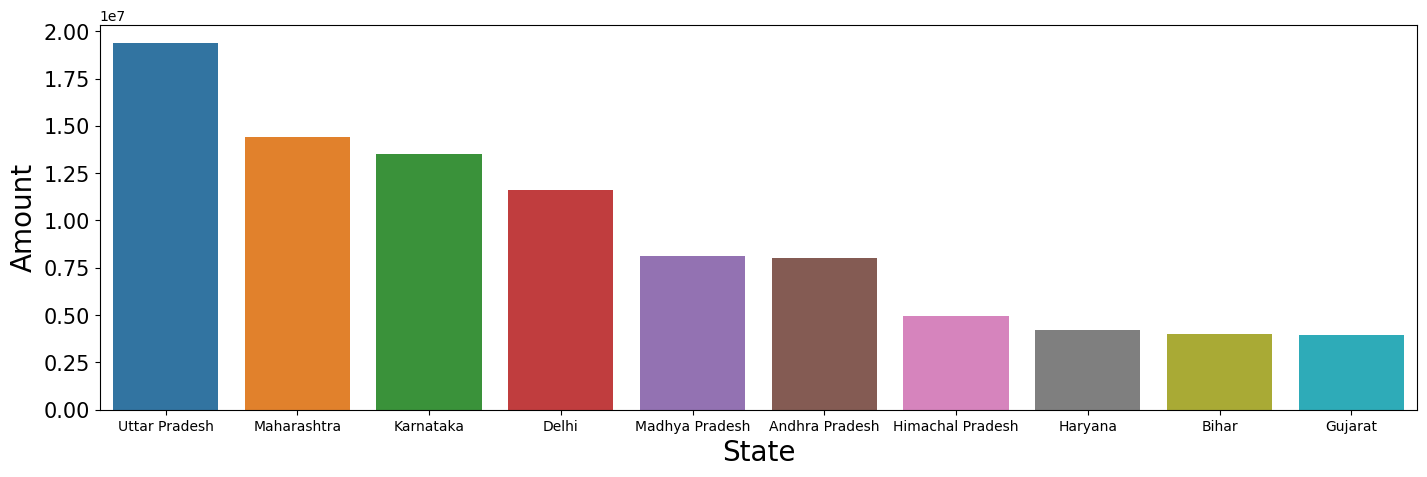

In [271]:
am = df.groupby(["State"],as_index=False)["Amount"].sum().sort_values("Amount",ascending=False).head(10)
plt.figure(figsize=(17,5))
plt.xlabel("State",fontsize=20)
plt.ylabel("Orders",fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)
stam = sns.barplot(x="State",y="Amount",data=am)
#for dl in stam.containers:
#    stam.bar_label(dl,fontsize=12,weight="bold")

### From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively.

### 5. Occupation

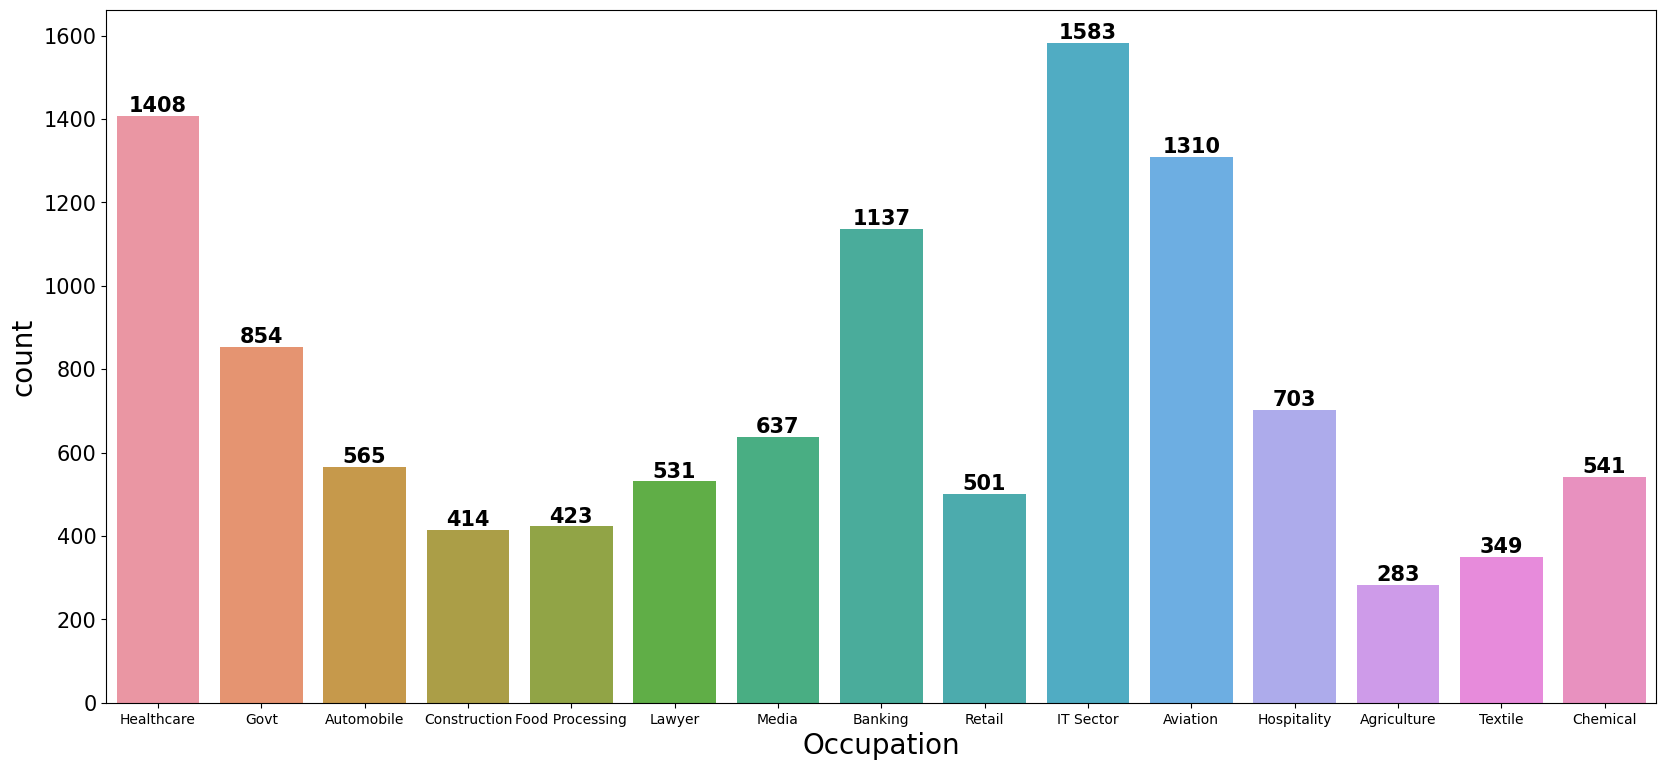

In [276]:
plt.figure(figsize=(20,9))
plt.xlabel("Occupation",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)
occ = sns.countplot(x="Occupation",data=df)
for dl in occ.containers:
    occ.bar_label(dl,fontsize=15,weight="bold")

<Axes: xlabel='Occupation', ylabel='Amount'>

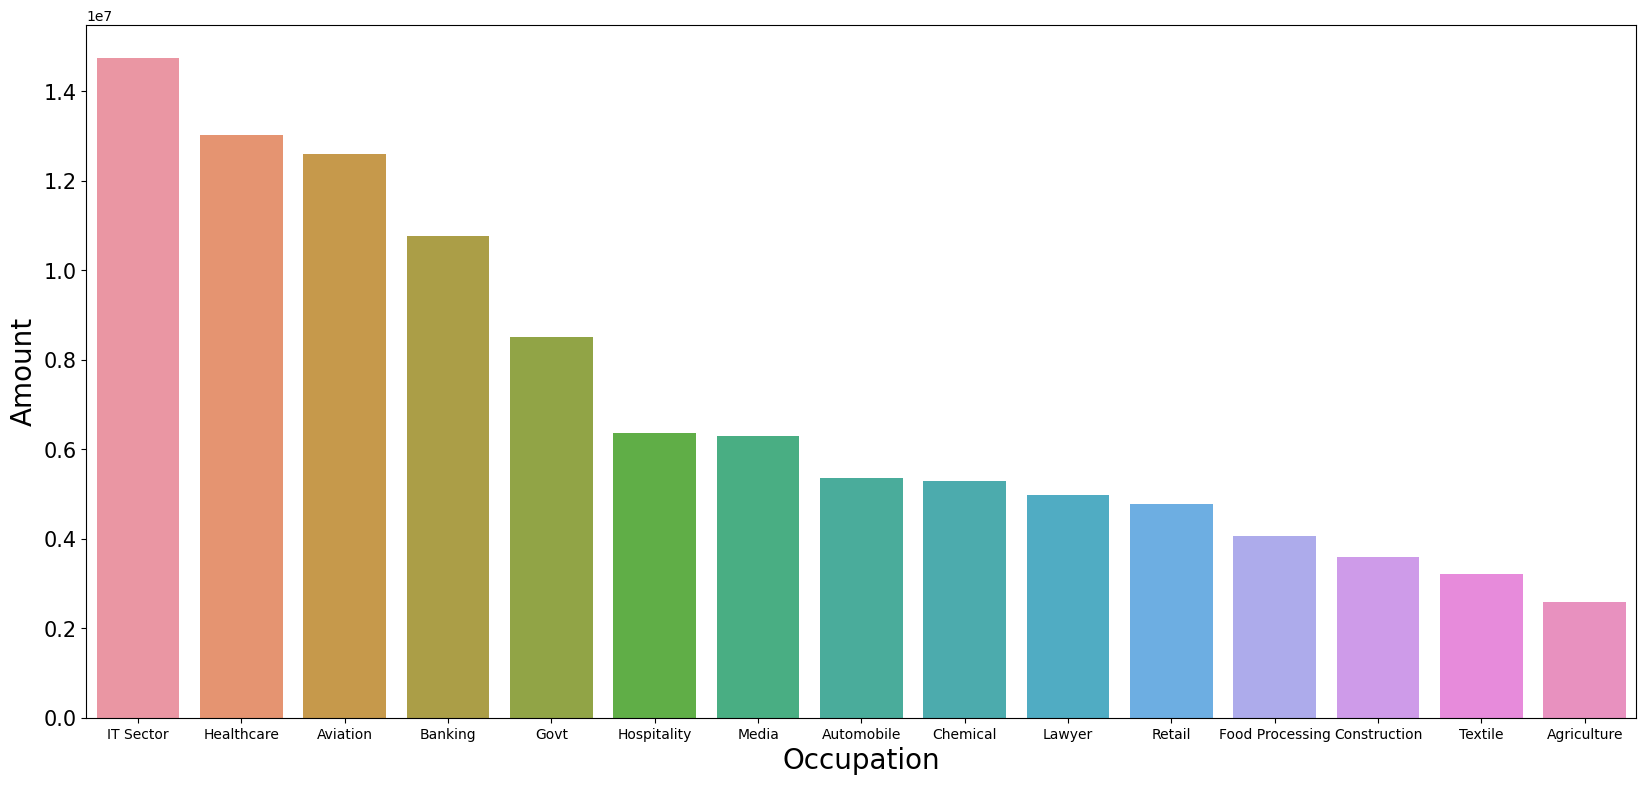

In [279]:
ocam = df.groupby(["Occupation"],as_index=False)["Amount"].sum().sort_values("Amount",ascending=False)
plt.figure(figsize=(20,9))
plt.xlabel("Occupation",fontsize=20)
plt.ylabel("Amount",fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)
op = sns.barplot(x="Occupation",y="Amount",data=ocam)
op

### From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector.

### 6. Product Category

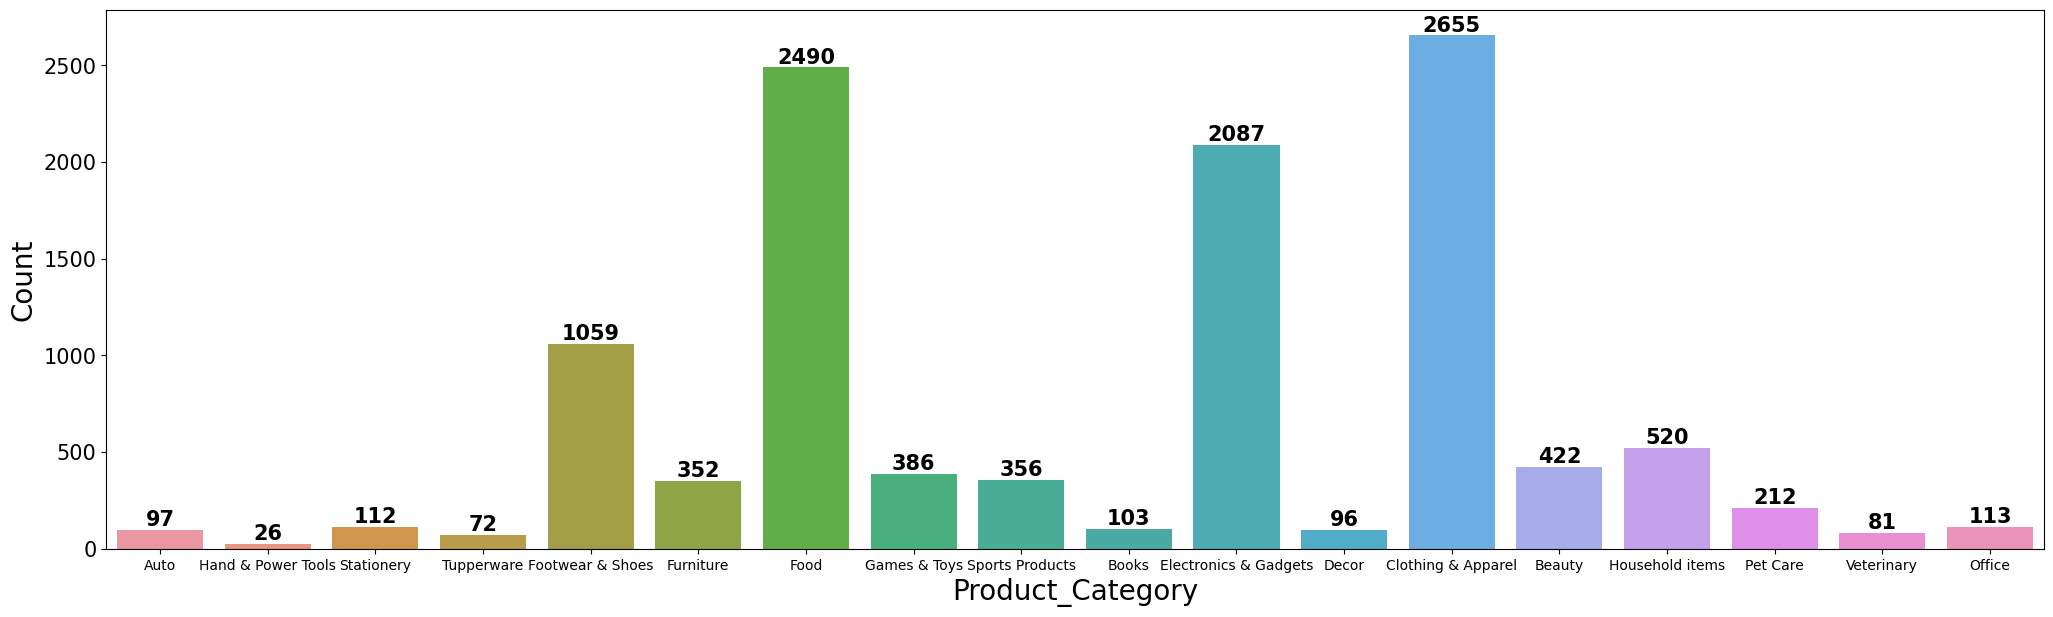

In [282]:
plt.figure(figsize=(25,7))
plt.xlabel("Product_Category",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)
pc = sns.countplot(x="Product_Category",data=df)
plt.xlabel("Product_Category",fontsize=20)
plt.ylabel("Count",fontsize=20)
for dl in pc.containers:
    pc.bar_label(dl,fontsize=15,weight="bold")

In [204]:
raw = df.groupby(["Product_Category"],as_index=False)["Amount"].sum().sort_values("Amount",ascending=False).head(10)
raw

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1958609
15,Stationery,1676051


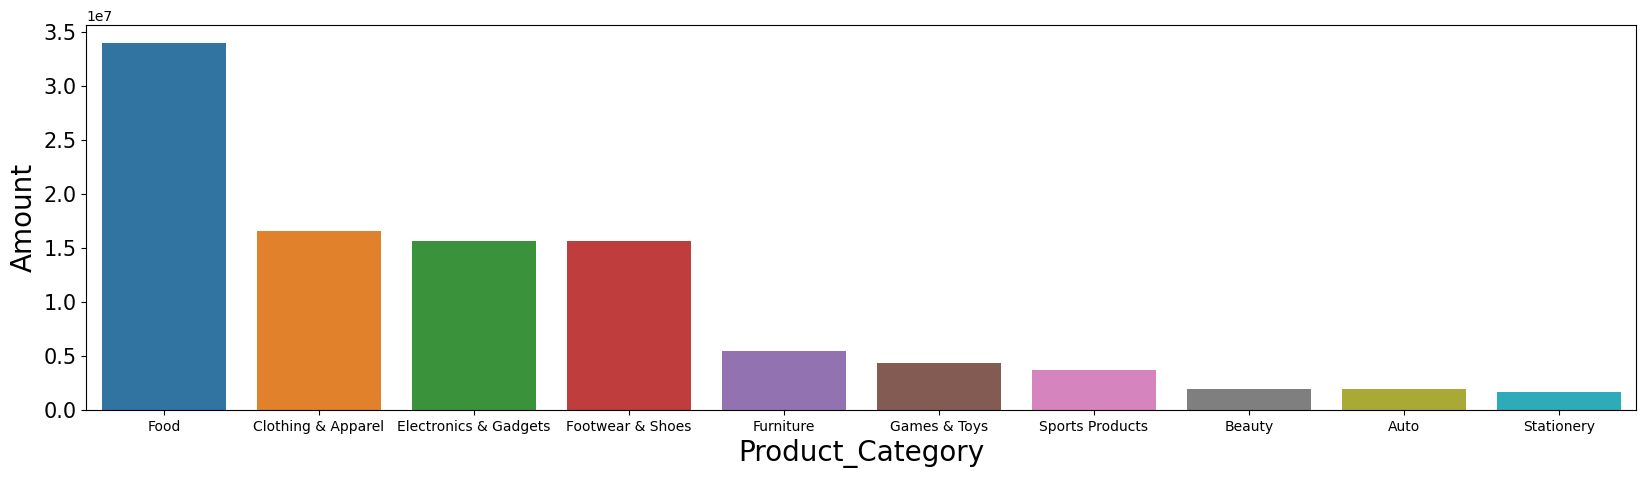

In [285]:
plt.figure(figsize=(20,5))
plt.xlabel("Product_Category",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)
pdm = sns.barplot(x="Product_Category",y="Amount",data=raw)

### From the above graphs, we can see that most of the sold products are Clothing & Apparel, Food, and Electronics & Gadgets, respectively. However, the valuation of the sold products does not follow the same order. In terms of valuation, Food ranks first, followed by Clothing & Apparel, and then Electronics & Gadgets.

### 7. Product ID

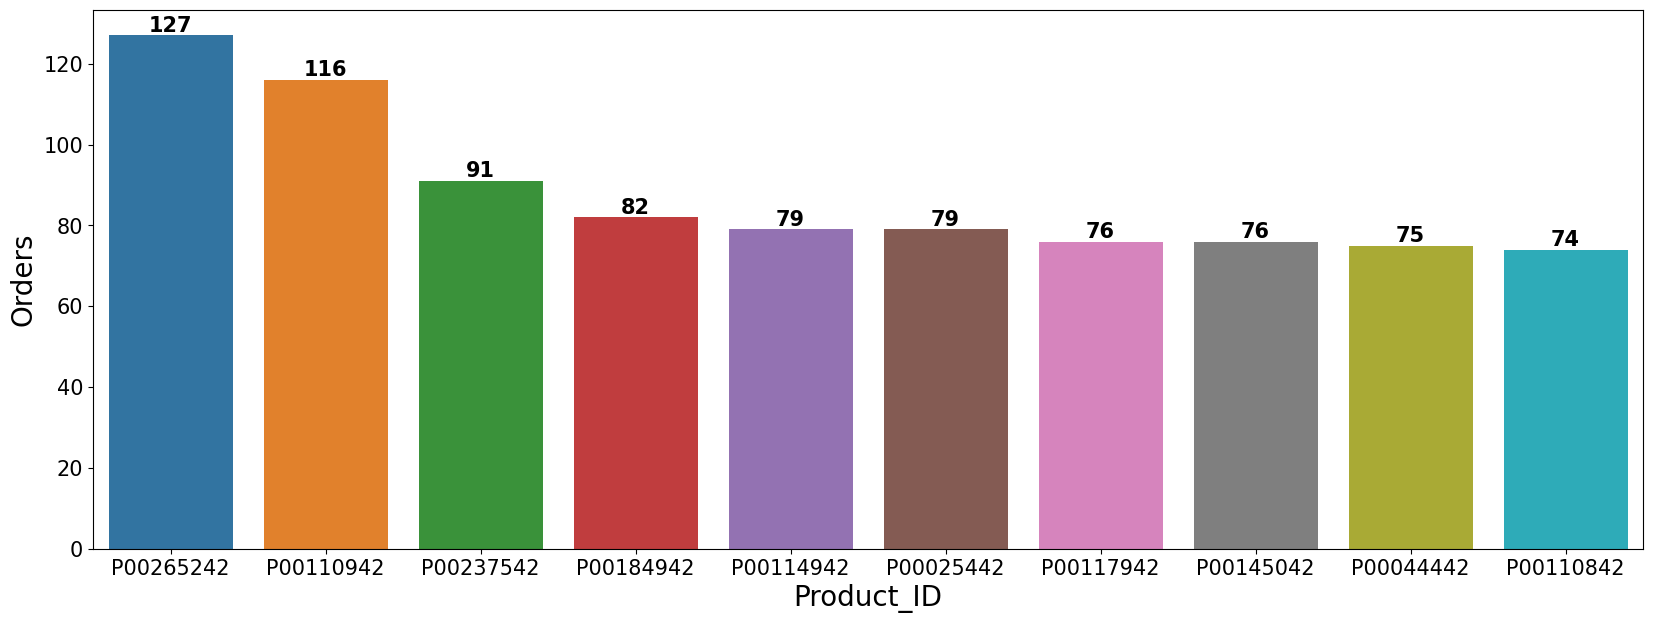

In [234]:
po = df.groupby(["Product_ID"],as_index=False)["Orders"].sum().sort_values("Orders",ascending=False).head(10)
plt.figure(figsize=(20,7))
plt.xlabel("Product_ID",fontsize=20)
plt.ylabel("Orders",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
id = sns.barplot(x="Product_ID",y="Orders",data=po)
for dl in id.containers:
    id.bar_label(dl,fontsize=15,weight="bold")

## Conclusion

### Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.

## Suggestions:
### 1. Customers with higher spending patterns should be targeted with loyalty programs and exclusive promotions. This can increase retention and ensure consistent purchases from high-value customer segments.
### 2. Analyze seasonal trends in product demand to optimize inventory levels before peak sales periods. This can prevent stockouts during high-demand times and reduce overstock during off-peak periods.
### 3. Product categories with lower sales could be bundled or discounted to increase their appeal. This approach can move slow-moving inventory and increase total sales volume.
### 4. Leverage data from customer demographics to create targeted marketing campaigns. For example, younger customers might respond well to digital advertising and influencer partnerships, while older demographics may respond better to email marketing.